# Introduction
In Part III, we will use machine learning techniques to predict the 'quality' score of the wine. The process goes like this: 

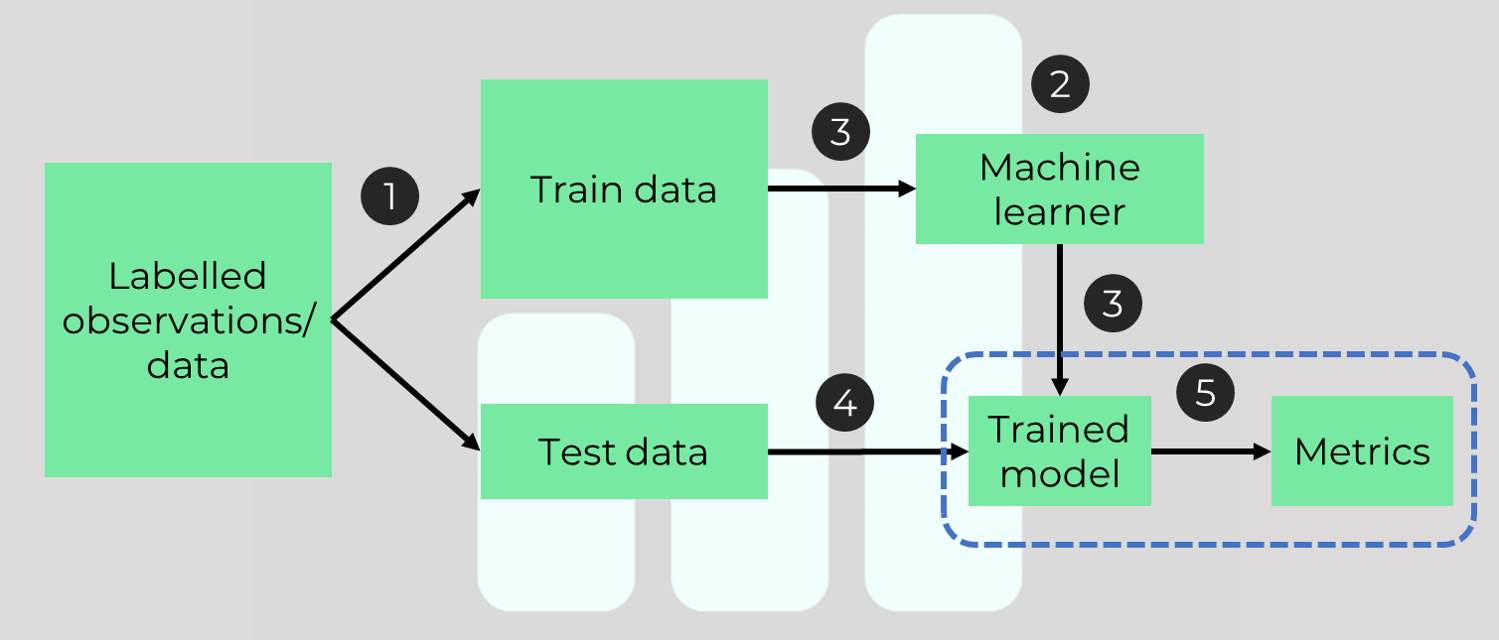

We put this section on all of the projects in UpLevel so bear with us if you've seen this before. 

Generally, the machine learning process has five parts:
1. <strong>Split your data into train and test set</strong>
2. <strong>Model creation</strong>
<br>
Import your models from sklearn and instantiate them (assign model object to a variable)
3. <strong>model fitting</strong>
<br>
Fit your training data into the model and train train train
4. <strong>model prediction</strong>
<br>
Make a set of predictions using your test data, and
5. <strong>Model assessment</strong>
<br>
Compare your predictions with ground truth in test data

Highly recommended readings:
1. [Important] https://scipy-lectures.org/packages/scikit-learn/index.html
2. https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
3. https://scikit-learn.org/stable/tutorial/basic/tutorial.html

### Step 1: Import your libraries
We will be using models from sklearn - a popular machine learning library. However, we won't import everything from sklearn and take just what we need. 

We'll need to import plotting libraries to plot our predictions against the ground truth (test data). 

Import the following:
1. pandas as pd
2. numpy as np

In [1]:
# Step 1: Import your libraries
import pandas as pd
import numpy as np

### Step 2: Read the CSVs from Part I
Time to load the CSVs that we got - red, white, combined - into DataFrames using pandas.

In [2]:
# Step 2: Read the three CSVs from Part I
df_red = pd.read_csv("winequality-red.csv", sep = ';')
df_white = pd.read_csv("winequality-white.csv", sep = ';')
df = pd.read_csv("df_comb.csv", index_col = 0)

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isRed
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


### Step 3: Import machine learning libraries
We hope you've taken a look at the two articles at the start of this notebook because it'll be useful. We will now import the libraries that we need for machine learning.

Import the following libraries and methods:
1. train_test_split - sklearn.model_selection
2. DummyClassifier - sklearn.dummy
3. LogisticRegression - sklearn.linear_model
3. DecisionTreeClassifier - sklearn.tree
4. RandomForestClassifier - sklearn.ensemble
5. GradientBoostClassifier - sklearn.ensemble
6. f1_score - sklearn.metrics
7. confusion matrix - sklearn.metrics

In [18]:
# Step 3: Import additional libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Red wine quality prediction
In this section, we start with predicting the quality of the wine using machine learning.

### Step 4: Prepare the independent and dependent variables
Once we're done importing the machine learning libraries, we can prepare the independent and dependent variables. To do this, we shall:
1. Declare a variable, and assign the indepedent variables to it, i.e. drop 'quality' column
2. Declare another variable, and assign the dependent variables to it, i.e. get only the 'quality' column values

In [11]:
# Step 4: Prepare your independent and dependent values
X = df_red.drop('quality', axis = 1)
y = df_red['quality']

### Step 5: Split your indepedent and dependent variables into train and test sets¶
We'll be using a 80/20 split for train and test set respectively, using the train_test_split function. 

Stratify using y as well because the classes are imbalanced.

In [12]:
# Step 5: Split your red wine data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

### Step 6: Train your machine learning model
After you've split your data, machine learning begins.

This is what you'll need to do:

1. Start with a model
2. Declare a variable, and store your model in it (don't forget to use brackets)
3. Fit your training data into the instantiated model
4. Declare a variable that contains predictions from the model you just trained, using the train dataset (X_test)

We strongly recommend starting with DummyClassifier to establish a baseline for your predictions.

Also, the recommended readings will be very helpful.

In [14]:
# Step 6a: Declare a variable to store the model (DummyClassifier)
dummy = DummyClassifier()

# Step 6b: Fit your train dataset
dummy.fit(X_train, y_train)

# Step 6c: Declare a variable and store your predictions that you make with your model using X test data
y_pred = dummy.predict(X_test)

### Step 7: Assess the prediction by the model
After you're done predicting, you will need to assess the predictions. To do this, you will need to print out:
1. f1_score, using average = 'micro'
2. confusion_matrix

The f1_score is a metric that assesses a classificaton result, calculated by how well the predicted values match the ground truth. We're using 'micro' for the 'average' parameter because 'micro' is good for imbalanced datasets. 

The confusion matrix shows you what the actual y values are compared to the prediction.

In [23]:
# Step 7a: Print the f1_score for y test and the predictions
print (metrics.f1_score(y_test, y_pred, average = 'micro'))

# Step 7b: Print the confusion matrix for y test and the predictions
print(metrics.confusion_matrix(y_test, y_pred))

0.425
[[  0   0   2   0   0   0]
 [  0   0  11   0   0   0]
 [  0   0 136   0   0   0]
 [  0   0 128   0   0   0]
 [  0   0  40   0   0   0]
 [  0   0   3   0   0   0]]


### Step 8: Train another machine learning model
Now that we have established a baseline using DummyClassifier, we will now train a proper model for predicting the quality data. 

We will repeat Steps 6-7, but with another model. You can choose one of the several models you imported, i.e. LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostClassifier.

Feel free to replicate the code block below so that you can try a few models.

In [27]:
# Step 8a: Declare a variable to store the model
logreg = LogisticRegression()

# Step 8b: Fit your train dataset
logreg.fit(X_train, y_train)

# Step 8c: Declare a variable and store your predictions that you make with your model using X test data
y_pred = logreg.predict(X_test)

# Step 8d: Print the f1_score for y test and the predictions
print(metrics.f1_score(y_test, y_pred, average = 'micro'))

# Step 8e: Print the confusion matrix for y test and the predictions
print(metrics.confusion_matrix(y_test, y_pred))

0.54375
[[  0   0   2   0   0   0]
 [  0   0   8   3   0   0]
 [  0   0 100  36   0   0]
 [  0   0  54  74   0   0]
 [  0   0   3  37   0   0]
 [  0   0   0   3   0   0]]


/Users/kelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Step 9: Reframing the problem as a binary classification
Generally, your model's performance will be better than DummyClassifier.

However, instead of this as a multi-class classification problem, can we reframe this into something simpler? 

In Part II Step 3, we see that most of the wine quality belongs to 5 and 6 while the other qualities are in the minority. As such, it can be challenging to predict the minority classes accurately. You can see this from the confusion matrices as well.

<strong>We can simplify this problem by reframing this into a binary classification problem.</strong>

From a common sense perspective, consumers only care about this question - is it good (1) or not (0)? 

Let's bin the 'quality' values into two classes:
1. not good (quality < 7) - 0
2. good (quality >= 7) - 1

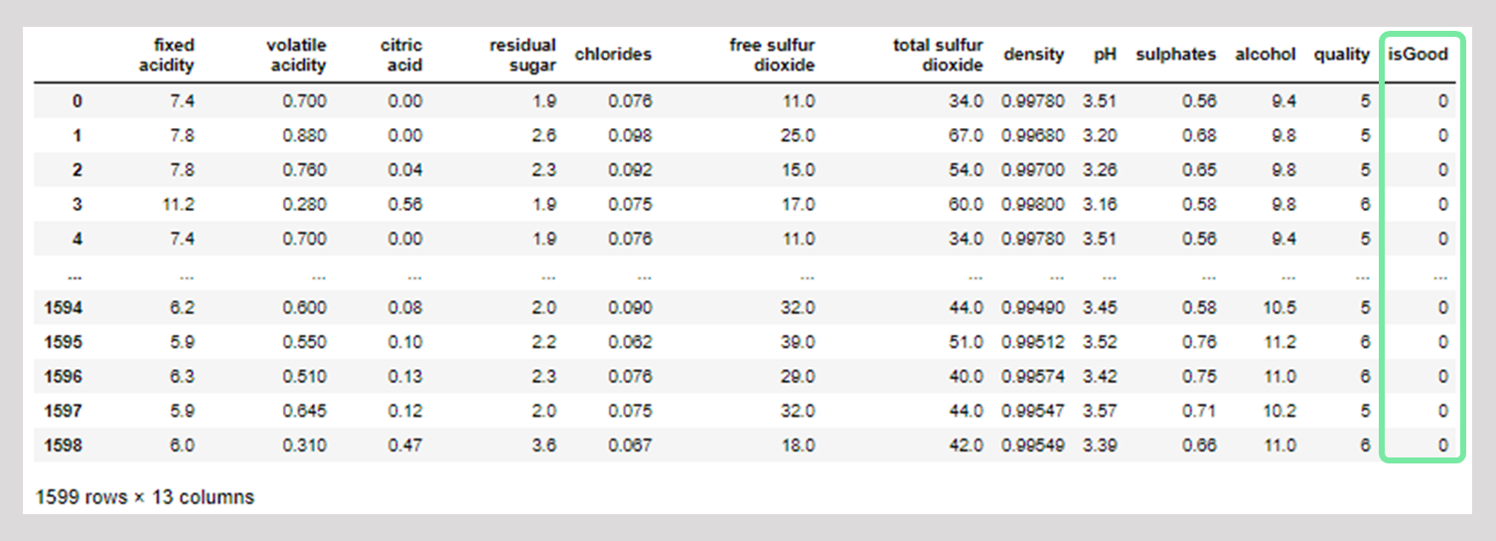

Create a list that contain either 1 or 0, and make a new column named isGood using that list.

In [49]:
# Step 9: Create a new column called isGood
df_red['isGood'] = 0
for x in range(1599):
    if df_red['quality'][x] >= 7:
        df_red['isGood'][x] = 1
    else: 
        df_red['isGood'][x] = 0


/var/folders/ck/bqnzcsy54vg64qj91w74924r0000gn/T/ipykernel_14786/2031982598.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['isGood'][x] = 0
/var/folders/ck/bqnzcsy54vg64qj91w74924r0000gn/T/ipykernel_14786/2031982598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['isGood'][x] = 1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isGood
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [51]:
df_red['isGood'].value_counts()

0    1382
1     217
Name: isGood, dtype: int64

### Step 10: Get the count of values in isGood
We want to know the distribution of 0 and 1 in the newly created isGood column. 

This is so that we can identify whether we'll be working with a balanced or imbalanced set of dependent variables.

In [52]:
# Step 10: Get the value count of isGood
df_red['isGood'].value_counts()

0    1382
1     217
Name: isGood, dtype: int64

### Step 11: Repeat Steps 7 to 8 with the new dataset
Looks like we're still working with an imbalanced dataset, but at least there are only two classes. 

We will perform Steps 7 to 8 again, and assess whether this approach is good. 

Start with a DummyClassifier so that you can compare your subsequent classification results. 

On top of f1_score, we will also use AUC score, which you can import from sklearn.metrics.

In [59]:
# Step 11a: Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Step 11b: Declare X variable containing everything in the red wine DataFrame except quality and isGood
X = df_red.drop(['quality', 'isGood'], axis = 1)

# Step 11c: Declare y variable containing the isGood column
y = df_red['isGood']

# Step 11d : Split your X and new y with train_test_split, with 0.2 test_size and stratify by y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

# Step 11e: Declare a variable to store DummyClassifier
dummy = DummyClassifier()

# Step 11f: Fit your train dataset
dummy.fit(X_train, y_train)

# Step 11g: Declare a variable and store your predictions that you make with your model using X test data
y_pred = dummy.predict(X_test)

# Step 11h: Declare a variable to store the model of your choice (try DecisionTreeClassifier or RandomForestClassifier)
dtree = DecisionTreeClassifier()

# Step 11i: Fit your train dataset
dtree.fit(X_train, y_train)

# Step 11j: Declare a variable and store your predictions that you make with your model using X test data
y_pred_dtree = dtree.predict(X_test)

# Step 11k: Print the f1_score for dummy predictions, with average parameter with micro
print(metrics.f1_score(y_test, y_pred, average = 'micro'))

# Step 11l: Print the f1_score for model predictions, with average parameter with micro
print(metrics.f1_score(y_test, y_pred_dtree, average = 'micro'))

# Step 11m: Print the AUC score for dummy predictions
print(metrics.roc_auc_score(y_test, y_pred))

# Step 11n: Print the AUC score for model predictions
print(metrics.roc_auc_score(y_test, y_pred_dtree))

# Step 11o: Look at the confusion matrix for y test and dummy prediction
print(metrics.confusion_matrix(y_test, y_pred))

# Step 11p: Look at the confusion matrix for y test and model prediction
print(metrics.confusion_matrix(y_test, y_pred_dtree))

0.865625
0.88125
0.5
0.7742422970363529
[[277   0]
 [ 43   0]]
[[255  22]
 [ 16  27]]


### Wrap up for red wine analysis
In the context of this approach, how did we do? 

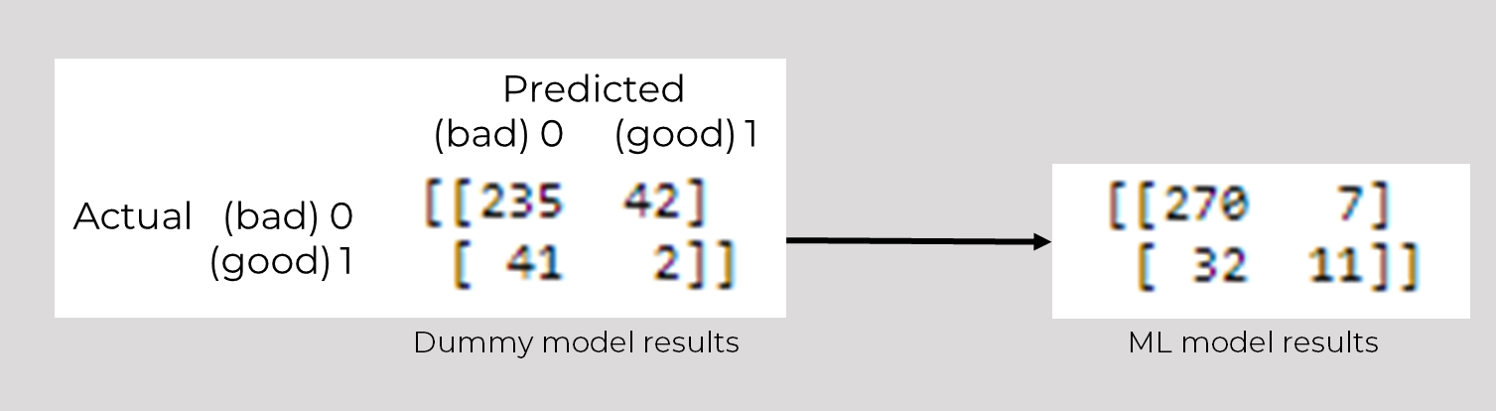

It depends on the business context. More importantly, if you put yourself in the shoes of a wine business, it would be in your best interest to avoid predicting a wine as good (1) when it actually isn't. 

With reference to the image above, it means we have 42 wine that is mistakenly identified as good but it actually isn't. This may lead to angry customers since they expected good wine.

On the other hand, there were 41 good wines that were predicted as bad - the worst case scenario here would be customers missing out on good wine. 

However, with the trained model, we successfully shifted the numbers in two places:
1. Reducing the number of false positives, i.e. from 42 to 7
2. Increase the number of true positives, i.e. from 2 to 11

<strong>This is a huge improvement.</strong>

## White wine quality prediction
After red wine, it's time to perform the quality prediction for white wine. You've already trained a model for red wine, it should be the same for you.

However, based on the the EDA we performed in Part II, we should expect a different model performance since there are:
1. Larger sample size
2. Different distribution of values in the columns

### Step 12: Repeat Steps 4 - 8 for white wine 'quality' prediction
Let's train a model to predict 'quality' for white wine, followed by assessment of model performance.

If need be, refer to the steps above! 

In [64]:
# Step 12a: Declare X variable containing everything in the white wine DataFrame except quality
X = df_white.drop('quality', axis = 1)
y = df_white['quality']

# Step 12b: Declare y variable containing the quality column


# Step 12c : Split your X and new y with train_test_split, with a test size of 0.2 and stratified by y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

# Step 12d: Declare a variable to store DummyClassifier
dummy = DummyClassifier()
# Step 12e: Fit your train dataset
dummy.fit(X_train, y_train)

# Step 12f: Declare a variable and store your predictions that you make with your Dummy model using X test data
y_pred = dummy.predict(X_test)

# Step 12g: Declare a variable to store the model of your choice (try DecisionTreeClassifier or RandomForestClassifier)
randf = RandomForestClassifier()

# Step 12h: Fit your train dataset
randf.fit(X_train, y_train)

# Step 12i: Declare a variable and store your predictions that you make with your model using X test data
y_pred_randf = randf.predict(X_test)

# Step 12j: Print the f1_score for dummy predictions, with average parameter with micro
print(metrics.f1_score(y_test, y_pred, average = 'micro'))

# Step 12k: Print the f1_score for model predictions, with average parameter with micro
print(metrics.f1_score(y_test, y_pred_randf, average = 'micro'))

# Step 12l: Look at the confusion matrix for y test and dummy prediction
print(metrics.confusion_matrix(y_test, y_pred))
      
# Step 12m: Look at the confusion matrix for y test and model prediction
print(metrics.confusion_matrix(y_test, y_pred_randf))

0.4489795918367347
0.673469387755102
[[  0   0   0   4   0   0   0]
 [  0   0   0  33   0   0   0]
 [  0   0   0 291   0   0   0]
 [  0   0   0 440   0   0   0]
 [  0   0   0 176   0   0   0]
 [  0   0   0  35   0   0   0]
 [  0   0   0   1   0   0   0]]
[[  0   0   3   0   1   0   0]
 [  0   4  13  16   0   0   0]
 [  0   2 193  95   1   0   0]
 [  0   1  66 350  23   0   0]
 [  0   0   1  76  97   2   0]
 [  0   0   0  11   8  16   0]
 [  0   0   0   1   0   0   0]]


### Step 13: Repeat Steps 9 - 11 to predict whether white wine isGood
You would have noticed that the performance of the model is similar to the one in red wine. 

The distribution of the 'quality' is the same as what you'd find in red wine so we can consider binning the quality into 'isGood'.

In [67]:
# Step 13a: Create a new column called isGood
df_white['isGood'] = 0
for x in range(1599):
    if df_white['quality'][x] > 7:
        df_white['isGood'][x] = 1
        
df_white['isGood'].value_counts()

# Step 13b: Declare X variable containing everything in the white wine DataFrame except quality and isGood
X = df_white.drop(['quality','isGood'], axis = 1)
y = df_white['isGood']

# Step 13c: Declare y variable containing the isGood column


# Step 13d : Split your X and new y with train_test_split, with a test size of 0.2 and stratified by y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

# Step 13e: Declare a variable to store DummyClassifier
dummy = DummyClassifier()

# Step 13f: Fit your train dataset
dummy.fit(X_train, y_train)

# Step 13g: Declare a variable and store your predictions that you make with your model using X test data
y_pred = dummy.predict(X_test)

# Step 13h: Declare a variable to store the model of your choice (try DecisionTreeClassifier or RandomForestClassifier)
dtree = DecisionTreeClassifier()

# Step 13i: Fit your train dataset
dtree.fit(X_train, y_train)

# Step 13j: Declare a variable and store your predictions that you make with your model using X test data
y_pred_dtree = dtree.predict(X_test)

# Step 13k: Print the f1_score for dummy predictions
print(metrics.f1_score(y_test, y_pred, average = 'micro'))

# Step 13l: Print the f1_score for model predictions
print(metrics.f1_score(y_test, y_pred_dtree, average = 'micro'))

# Step 13m: Print the AUC score for dummy predictions
print(metrics.roc_auc_score(y_test, y_pred))

# Step 13n: Print the AUC score for model predictions
print(metrics.roc_auc_score(y_test, y_pred_dtree))

# Step 13o: Look at the confusion matrix for y test and dummy prediction
print(metrics.confusion_matrix(y_test, y_pred))

# Step 13p: Look at the confusion matrix for y test and model prediction
print(metrics.confusion_matrix(y_test, y_pred_dtree))

0.9857142857142858
0.9775510204081632
0.5
0.6014492753623188
[[966   0]
 [ 14   0]]
[[955  11]
 [ 11   3]]


/var/folders/ck/bqnzcsy54vg64qj91w74924r0000gn/T/ipykernel_14786/2369953069.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white['isGood'][x] = 1


## Red + white wine quality prediction
Now that we're done with red and white wine data separately, here comes the twist - let's see if we can get a model that is generalizable enough so that it can predict the quality for both red and white wine.

Make sure your combined dataset has a column called isRed. 

### Step 14: Repeat Steps 4 to 8 to predict 'quality'
You know the drill - we'll leave this to you to try implementing model training yourself without comments.

Start with training a model to predict 'quality'. 

If you're ever stuck, scroll up a bit for a refresher on how to train the model.

In [69]:
# Step 14: Train a model to predict 'quality'
X = df.drop('quality', axis = 1)
y = df['quality']


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y)

In [72]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)
print(metrics.f1_score(y_test, y_pred, average = 'micro'))
print(metrics.confusion_matrix(y_test, y_pred))

0.4369230769230769
[[  0   0   0   3   0   0]
 [  0   0   0  22   0   0]
 [  0   0   0 214   0   0]
 [  0   0   0 284   0   0]
 [  0   0   0 108   0   0]
 [  0   0   0  19   0   0]]


In [74]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print(metrics.f1_score(y_test, y_pred_dtree, average = 'micro'))
print(metrics.confusion_matrix(y_test, y_pred_dtree))

0.6169230769230769
[[  0   1   1   1   0   0]
 [  1   5  10   6   0   0]
 [  0   7 136  65   5   1]
 [  1   6  54 192  29   2]
 [  1   2   6  30  63   6]
 [  0   2   1   4   7   5]]


### Step 15: Repeat Step 9 - 11 to calculate whether the combined wine dataset isGood
Now that you're done with training a model to predict 'quality', let's see if we can come up with a general model that can predict whether the wine isGood. 

In [99]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
isRed                     int64
isGood                    int64
dtype: object

In [113]:
# Step 15: Train a model to predict whether a wine is good
df['isGood'] = 0
for x in range(1599):
    if [df['quality'][x] > 7]:
        df['isGood'][x] = 1
        
df['isGood'].value_counts()
        

/var/folders/ck/bqnzcsy54vg64qj91w74924r0000gn/T/ipykernel_14786/3372954379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isGood'][x] = 1
/var/folders/ck/bqnzcsy54vg64qj91w74924r0000gn/T/ipykernel_14786/3372954379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isGood'][x] = 1
/var/folders/ck/bqnzcsy54vg64qj91w74924r0000gn/T/ipykernel_14786/3372954379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isGood'][x]

/var/folders/ck/bqnzcsy54vg64qj91w74924r0000gn/T/ipykernel_14786/3372954379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isGood'][x] = 1
/var/folders/ck/bqnzcsy54vg64qj91w74924r0000gn/T/ipykernel_14786/3372954379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isGood'][x] = 1
/var/folders/ck/bqnzcsy54vg64qj91w74924r0000gn/T/ipykernel_14786/3372954379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isGood'][x]

/var/folders/ck/bqnzcsy54vg64qj91w74924r0000gn/T/ipykernel_14786/3372954379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isGood'][x] = 1
/var/folders/ck/bqnzcsy54vg64qj91w74924r0000gn/T/ipykernel_14786/3372954379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isGood'][x] = 1
/var/folders/ck/bqnzcsy54vg64qj91w74924r0000gn/T/ipykernel_14786/3372954379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isGood'][x]

0    3299
1    3198
Name: isGood, dtype: int64

In [114]:
X = df.drop(['quality','isGood'], axis = 1)
y = df['isGood']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [116]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)
print(metrics.f1_score(y_test, y_pred, average = 'micro'))
print(metrics.confusion_matrix(y_test, y_pred))

0.5076923076923077
[[660   0]
 [640   0]]


In [117]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print(metrics.f1_score(y_test, y_pred_dtree, average = 'micro'))
print(metrics.confusion_matrix(y_test, y_pred_dtree))

0.7938461538461539
[[521 139]
 [129 511]]


### End of Part III
In this section, you successfully used machine learning to predict the quality of wine.

You've also learned to reframe a problem into a simpler one, with business context.

Practice makes perfect, and we hope you got adequate practice in this Part. In the next part, we will be reframing another business problem with the dataset, and use machine learning to solve it. 